In [23]:
import re
import numpy as np
import matplotlib.pyplot as plt

def readData(filename):
  bits_per_s = []
  msgs_per_s = []
  bytes_per_msg = []

  with open(filename, 'r') as file:
    for line in file:
      pattern = r'(\d+\.\d+)(\s*[^\s]+)\s*'
      matches = re.findall(pattern, line)
      values = [float(match[0]) for match in matches]
      assert len(values) == 3
      bits_per_s.append(values[0])
      msgs_per_s.append(values[1])
      bytes_per_msg.append(values[2])

  x = np.arange(0, len(bits_per_s) * 3, 3)
  return [x, bits_per_s, msgs_per_s, bytes_per_msg]

def drawPicture(data, msg_size):
  x, y1, y2, y3 = data
  _, axs = plt.subplots(1, 3, figsize=(20, 4))

  median_y1 = np.median(y1)
  axs[0].plot(x, y1)
  axs[0].set_xlabel('seconds')
  axs[0].set_ylabel('MiB/s')
  axs[0].set_title(f'{msg_size} msg size - MiB/s')
  axs[0].axhline(y=median_y1, color='r', label=f'{median_y1}')

  median_y2 = np.median(y2)
  axs[1].plot(x, y2)
  axs[1].set_xlabel('seconds')
  axs[1].set_ylabel('Msg/s')
  axs[1].set_title(f'{msg_size} msg size - Msgs/s')
  axs[1].axhline(median_y2, color='r', label=f'{median_y2}')
  
  median_y3 = np.median(y3)
  axs[2].plot(x, y3)
  axs[2].set_xlabel('seconds')
  axs[2].set_ylabel('bytes/mss')
  axs[2].set_title(f'{msg_size} msg size - bytes/msg')
  axs[2].axhline(median_y3, color='r', label=f'{median_y3}')

  plt.savefig(f'discard-{msg_size}.png')
  plt.show()


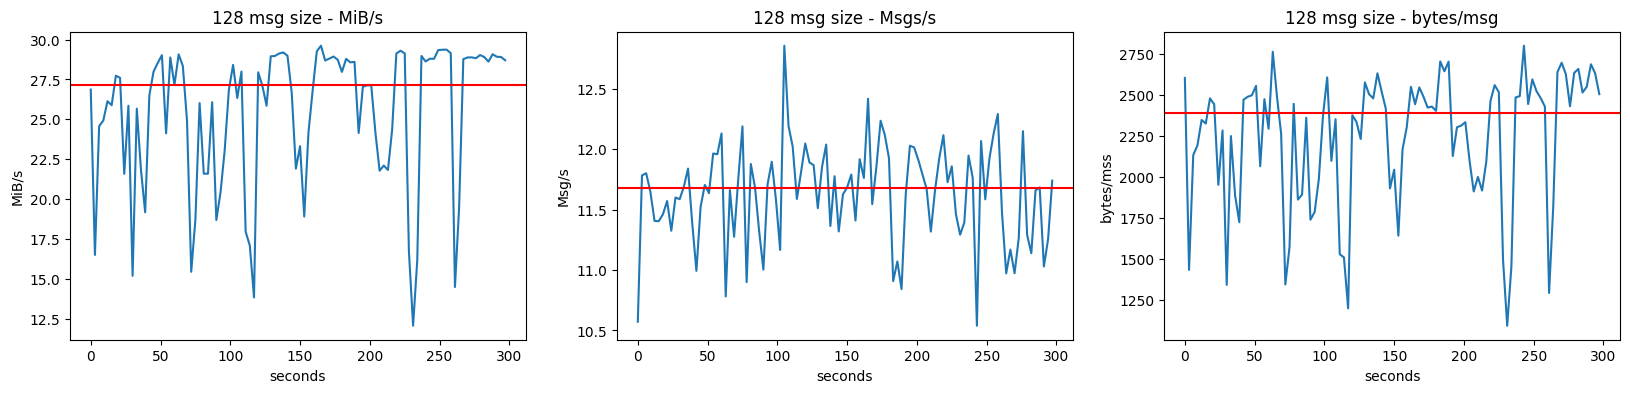

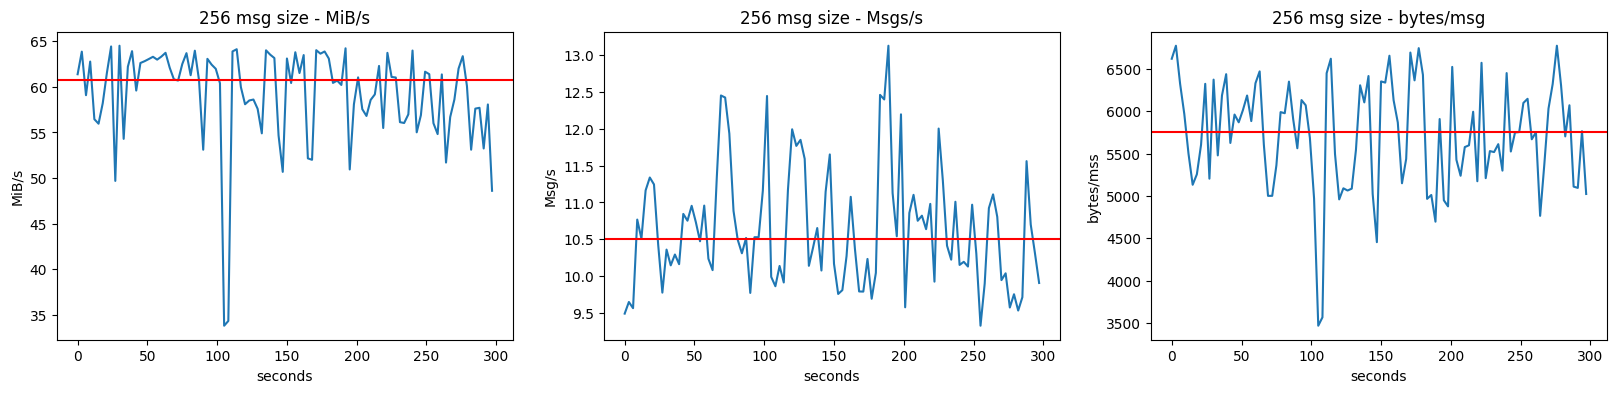

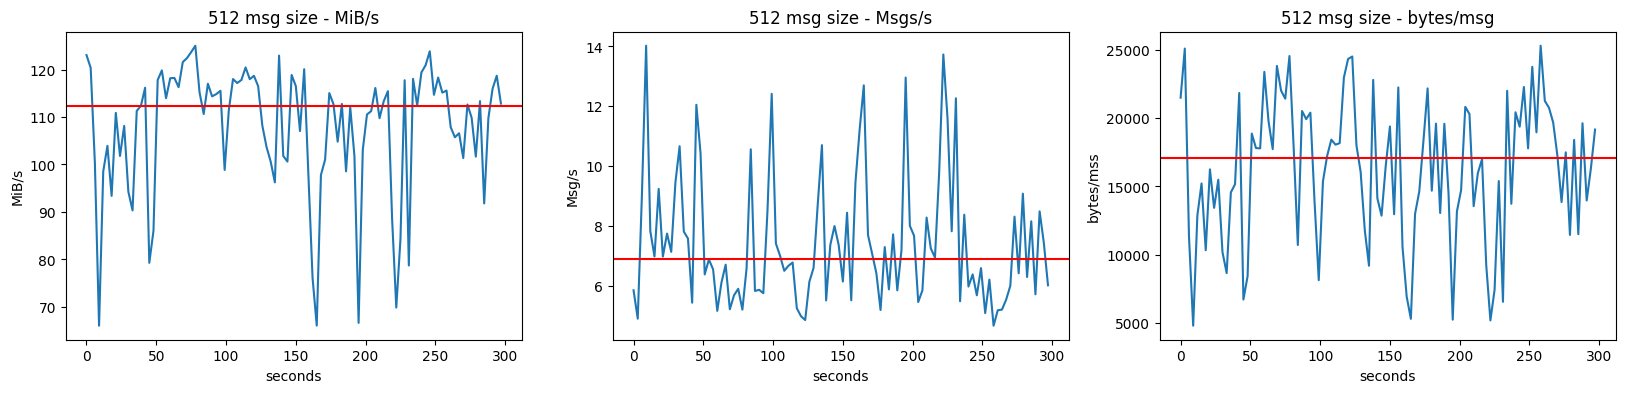

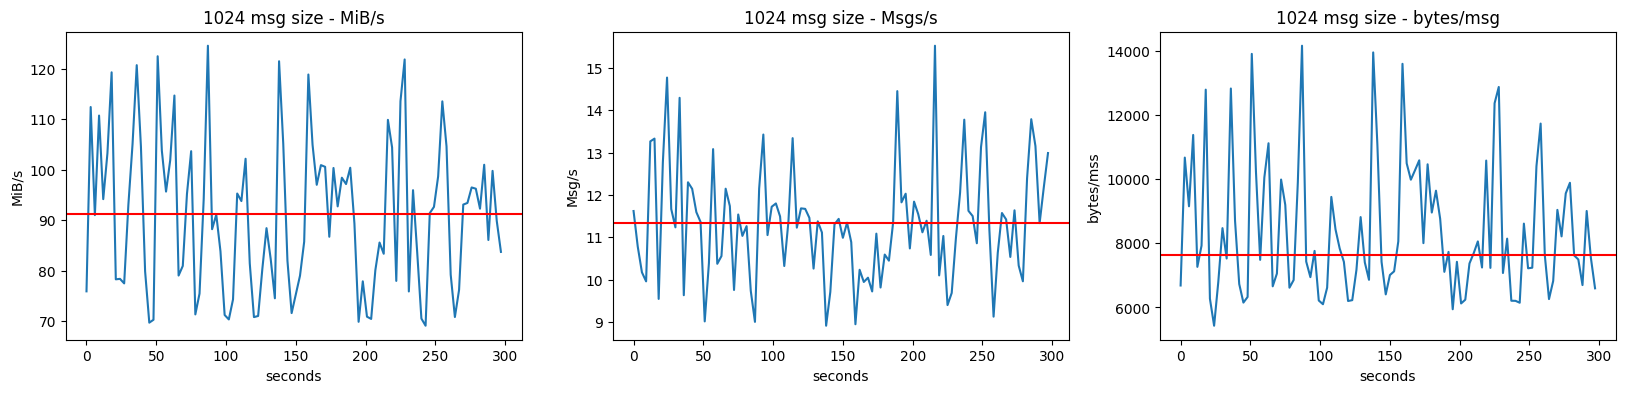

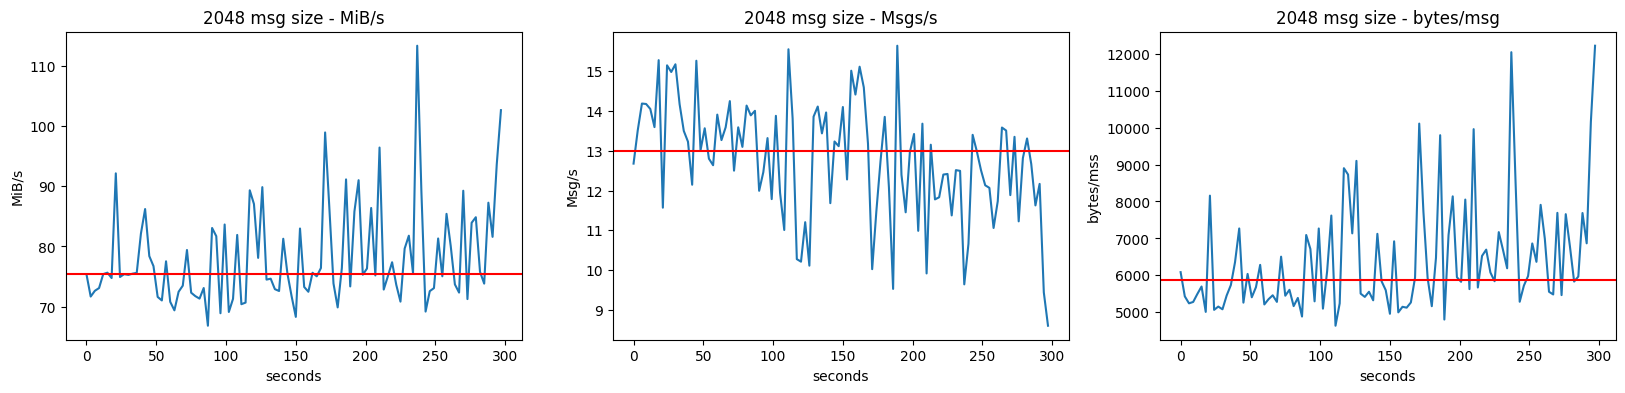

In [25]:
msg_sizes = [128, 256, 512, 1024, 2048]
for msg_size in msg_sizes:
  data = readData(f'discard-{msg_size}.log')
  drawPicture(data, msg_size)